# Correlation analysis between signal data and wear

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns
import os
%matplotlib inline


In [2]:
# Silences pandas warning that ruin the display of the notebook on github
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

## Calculate basic statistics for the c4 data set

In [3]:
def calculate_zero_crossings(signal):
    return ((np.diff(np.sign(signal)) != 0).sum())

In [4]:
def calculate_energy(signal):
    return np.sum(signal ** 2)

In [5]:
def calculate_statistics (file_path):
    df = pd.read_csv(file_path,sep=',')
    df.columns = ['Force_X', 'Force_Y', 'Force_Z', 'Vibration_X', 'Vibration_Y', 'Vibration_Z', 'AE_RMS']
    stats = pd.DataFrame()
    for column in df.columns:
        col_data = df[column]
        stats[column + "_min"] = [col_data.min()]
        stats[column + "_max"] = [col_data.max()]
        stats[column + "_mean"] = [col_data.mean()]
        stats[column + "_std"] = [col_data.std()]
        stats[column + "_skew"] = [skew(col_data)]
        stats[column + "_kurtosis"] = [kurtosis(col_data)]
        stats[column + "_energy"] = [calculate_energy(col_data)]
        stats[column + "_zero_crossings"] = [calculate_zero_crossings(col_data)]
    
    return stats 

In [6]:
folder_path = '../notebooks/data/raw/c4/c4/'

stats_list = []

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path) and filename.endswith('.csv'):
        stats_list.append(calculate_statistics(file_path))

c4_stats = pd.concat(stats_list, ignore_index=True)

In [7]:
c4_stats.head()

,Force_X_min,Force_X_max,Force_X_mean,Force_X_std,Force_X_skew,Force_X_kurtosis,Force_X_energy,Force_X_zero_crossings,Force_Y_min,Force_Y_max,...,Vibration_Z_energy,Vibration_Z_zero_crossings,AE_RMS_min,AE_RMS_max,AE_RMS_mean,AE_RMS_std,AE_RMS_skew,AE_RMS_kurtosis,AE_RMS_energy,AE_RMS_zero_crossings
0,-3.966,6.974,1.840447,1.697723,-0.104311,-0.727016,1.038203e+06,3445,-7.116,11.453,...,1031.914465,68054,-0.005,0.098,0.031739,0.011924,1.659363,6.687025,190.359729,20
1,-3.966,6.974,1.840447,1.697723,-0.104311,-0.727016,1.038203e+06,3445,-7.116,11.453,...,1031.914465,68054,-0.005,0.098,0.031739,0.011924,1.659363,6.687025,190.359729,20
2,-5.534,9.765,2.453208,2.611066,-0.003935,-0.637509,2.782161e+06,5559,-11.538,19.054,...,1620.673919,84252,-0.005,0.164,0.056294,0.017970,1.110105,5.726587,756.874365,16
3,-5.957,11.524,2.898154,3.135458,0.068945,-0.573171,4.071439e+06,5159,-13.933,23.878,...,1745.608944,89464,-0.005,0.189,0.074631,0.024344,0.380429,3.930329,1376.264421,24
4,-5.408,11.112,2.490291,2.857644,0.163850,-0.721620,3.341642e+06,5701,-23.316,20.085,...,1844.179424,86917,-0.005,0.232,0.074917,0.023767,0.984438,7.315131,1436.770071,42


#### Test for missing data:

In [8]:
c4_stats.isnull().sum().sum

<bound method Series.sum of Force_X_min                   0
Force_X_max                   0
Force_X_mean                  0
Force_X_std                   0
Force_X_skew                  0
Force_X_kurtosis              0
Force_X_energy                0
Force_X_zero_crossings        0
Force_Y_min                   0
Force_Y_max                   0
Force_Y_mean                  0
Force_Y_std                   0
Force_Y_skew                  0
Force_Y_kurtosis              0
Force_Y_energy                0
Force_Y_zero_crossings        0
Force_Z_min                   0
Force_Z_max                   0
Force_Z_mean                  0
Force_Z_std                   0
Force_Z_skew                  0
Force_Z_kurtosis              0
Force_Z_energy                0
Force_Z_zero_crossings        0
Vibration_X_min               0
Vibration_X_max               0
Vibration_X_mean              0
Vibration_X_std               0
Vibration_X_skew              0
Vibration_X_kurtosis          0
Vibration_X_

#### Create a correlation matrix between each stats

In [9]:
c4_corr_matrix = c4_stats.corr()

In [10]:
c4_corr_matrix.head()

,Force_X_min,Force_X_max,Force_X_mean,Force_X_std,Force_X_skew,Force_X_kurtosis,Force_X_energy,Force_X_zero_crossings,Force_Y_min,Force_Y_max,...,Vibration_Z_energy,Vibration_Z_zero_crossings,AE_RMS_min,AE_RMS_max,AE_RMS_mean,AE_RMS_std,AE_RMS_skew,AE_RMS_kurtosis,AE_RMS_energy,AE_RMS_zero_crossings
Force_X_min,1.000000,-0.996470,-0.971811,-0.998173,0.282000,0.686163,-0.979475,-0.726176,0.929506,-0.882875,...,-0.963292,-0.582063,NaN,-0.240211,-0.373950,-0.072534,0.580996,-0.502758,-0.333323,-0.077854
Force_X_max,-0.996470,1.000000,0.985042,0.998409,-0.284033,-0.710836,0.969312,0.745894,-0.942614,0.909403,...,0.955098,0.548076,NaN,0.219577,0.344669,0.055562,-0.561510,0.470797,0.300164,0.076121
Force_X_mean,-0.971811,0.985042,1.000000,0.979735,-0.350716,-0.778136,0.930019,0.775132,-0.951406,0.952435,...,0.923910,0.454024,NaN,0.155425,0.273969,0.007090,-0.509373,0.386591,0.229759,0.087322
Force_X_std,-0.998173,0.998409,0.979735,1.000000,-0.286006,-0.698222,0.977676,0.728958,-0.933908,0.893084,...,0.960165,0.573840,NaN,0.225195,0.355039,0.059901,-0.566786,0.480528,0.313345,0.080595
Force_X_skew,0.282000,-0.284033,-0.350716,-0.286006,1.000000,0.546388,-0.285437,-0.090686,0.282595,-0.362625,...,-0.273380,0.014227,NaN,0.086497,0.010949,0.072581,0.009121,-0.164858,-0.040493,-0.035689


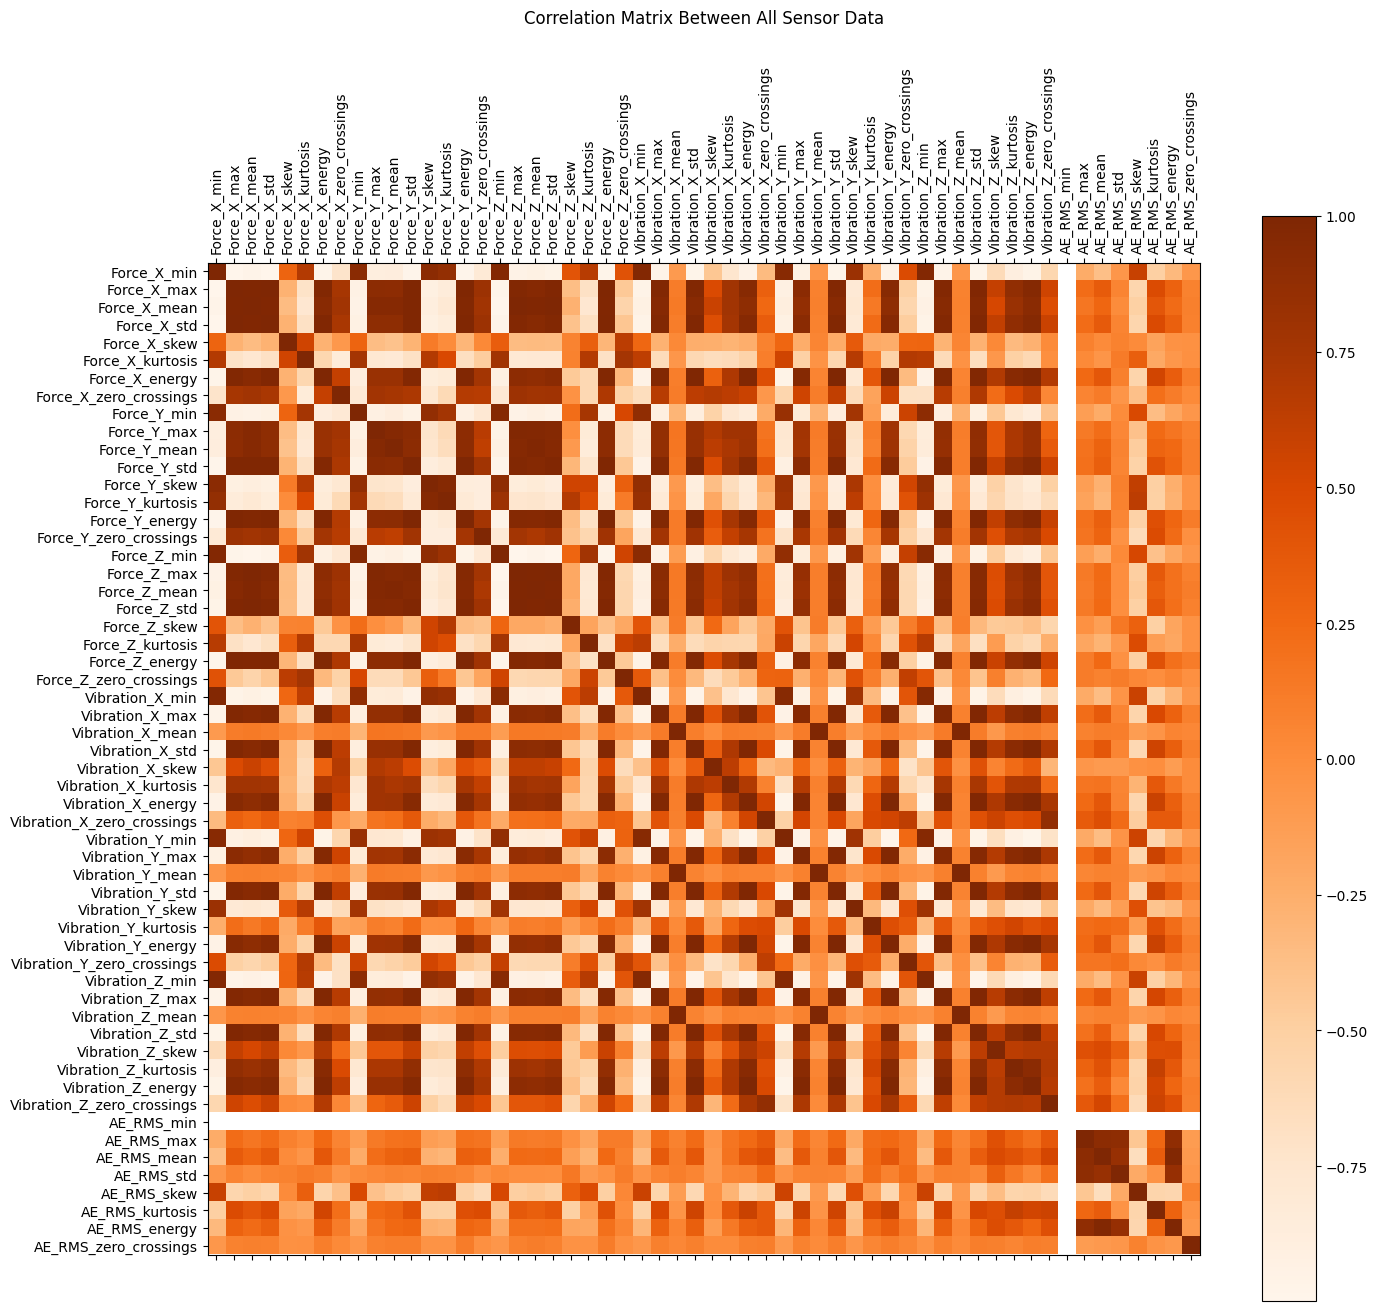

In [11]:
plt.figure(figsize=(16,14))
plt.matshow(c4_corr_matrix, fignum=1, cmap='Oranges')
plt.colorbar()
plt.xticks(range(len(c4_corr_matrix.columns)), c4_corr_matrix.columns, rotation=90)
plt.yticks(range(len(c4_corr_matrix.columns)), c4_corr_matrix.columns)
plt.title('Correlation Matrix Between All Sensor Data', pad=30)
plt.show()


## Load wear data

In [12]:
c4_wear_data = pd.read_csv('../notebooks/data/raw/c4/c4_wear.csv', sep=',')

In [13]:
c4_wear_data.head()

,cut,flute_1,flute_2,flute_3
0,1,31.416355,19.483692,21.748063
1,2,34.892770,23.473047,24.925960
2,3,38.102847,27.172868,27.898659
3,4,41.061023,30.599309,30.677848
4,5,43.781191,33.767870,33.274721


In [14]:
c4_wear_data.isnull().sum().sum

<bound method Series.sum of cut        0
flute_1    0
flute_2    0
flute_3    0
dtype: int64>

In [15]:
c4_wear_data = c4_wear_data.drop(columns=['cut'])

## Correlations between calculated statistics and wear data

In [16]:
c4_combined_data = pd.concat([c4_stats, c4_wear_data], axis=1)
c4_combined_corr_matrix = c4_combined_data.corr()

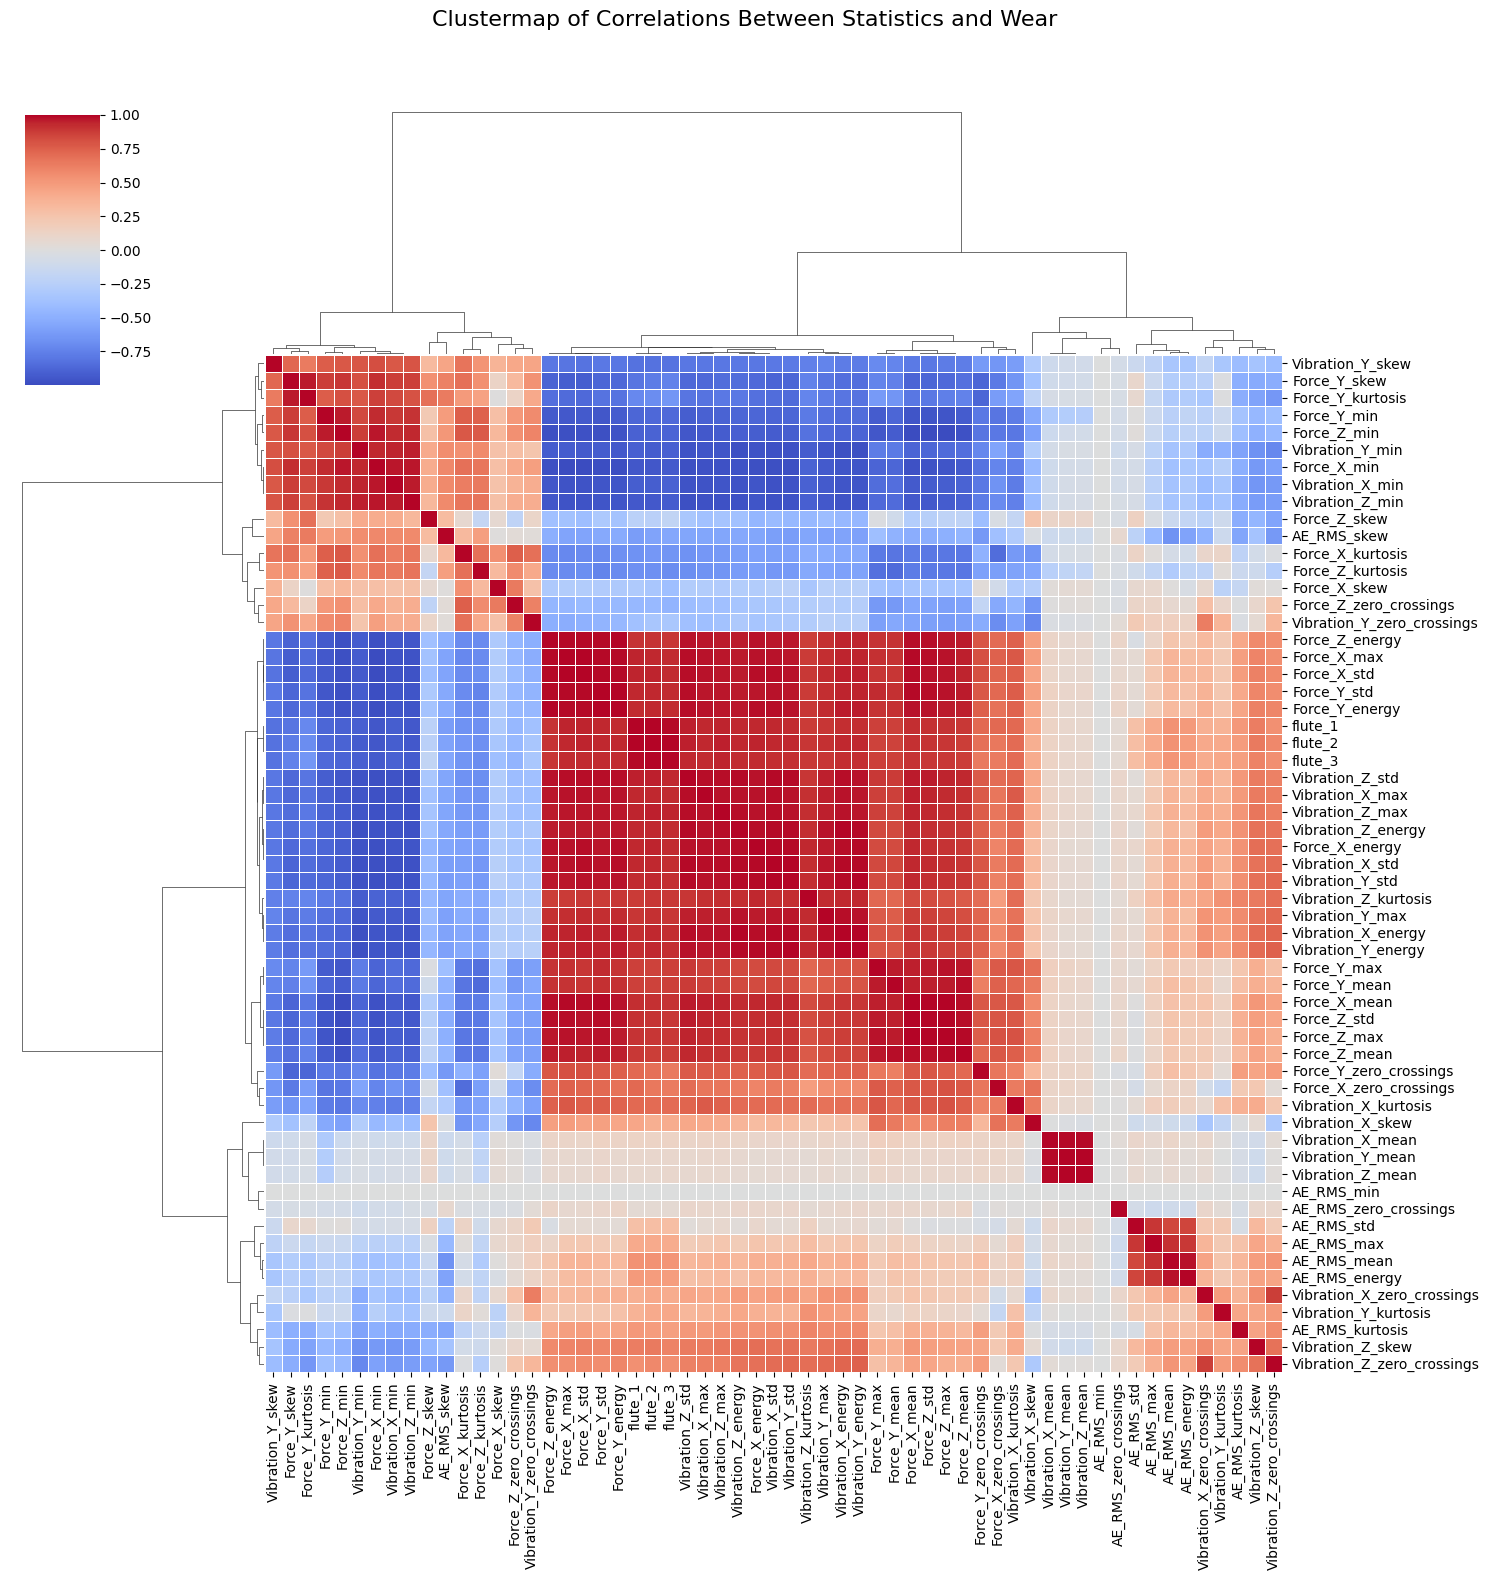

In [17]:
c4_combined_corr_matrix.fillna(1e-10, inplace=True)
clustermap = sns.clustermap(c4_combined_corr_matrix, metric='euclidean', method='ward', cmap='coolwarm', linewidths=0.5, figsize=(15, 15))
clustermap.figure.suptitle('Clustermap of Correlations Between Statistics and Wear', y=1.05, fontsize=16)
plt.show()


In [18]:
c4_combined_data = pd.concat([c4_stats, c4_wear_data], axis=1)
c4_combined_corr_matrix = c4_combined_data.corr()
c4_wear_corr_matrix = c4_combined_corr_matrix[['flute_1', 'flute_2', 'flute_3']].drop(['flute_1', 'flute_2', 'flute_3'], axis=0)

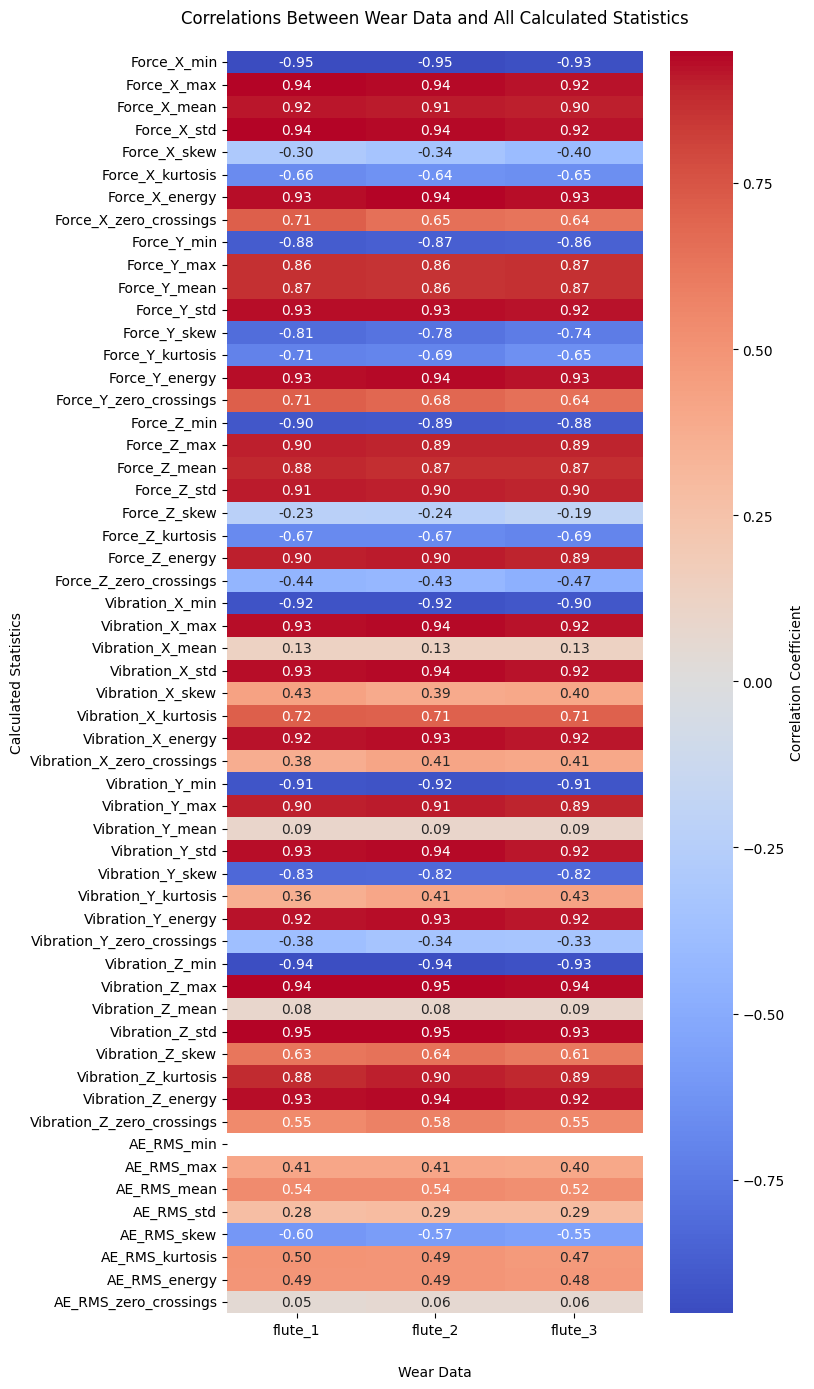

In [19]:

plt.figure(figsize=(8, 14))
sns.heatmap(c4_wear_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10}, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlations Between Wear Data and All Calculated Statistics', pad=20)
plt.ylabel('Calculated Statistics')
plt.xlabel('Wear Data', labelpad=20)
plt.tight_layout()
plt.show()


In [20]:
min_columns = [
    'Force_X_min', 
    'Force_Y_min', 
    'Force_Z_min', 
    'Vibration_X_min', 
    'Vibration_Y_min', 
    'Vibration_Z_min', 
    'AE_RMS_min'
]
min_stats = c4_stats[min_columns]
combined_data_min = pd.concat([min_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_min = combined_data_min.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
min_correlation_matrix = corr_matrix_min.loc[min_columns, wear_columns]


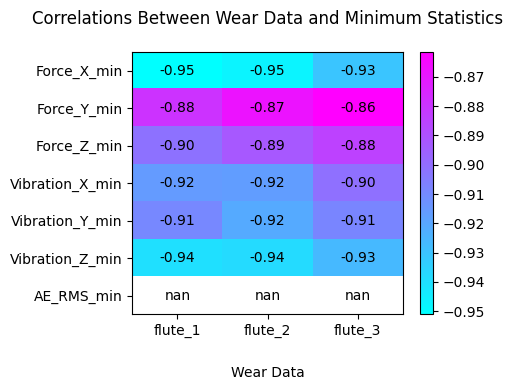

In [37]:

plt.figure(figsize=(5, 4))
plt.title('Correlations Between Wear Data and Minimum Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(min_correlation_matrix, cmap='cool', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(min_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(min_columns)), min_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()


In [22]:
max_columns = [
    'Force_X_max', 
    'Force_Y_max', 
    'Force_Z_max', 
    'Vibration_X_max', 
    'Vibration_Y_max', 
    'Vibration_Z_max', 
    'AE_RMS_max'
]
max_stats = c4_stats[max_columns]
combined_data_max = pd.concat([max_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_max = combined_data_max.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
max_correlation_matrix = corr_matrix_max.loc[max_columns, wear_columns]


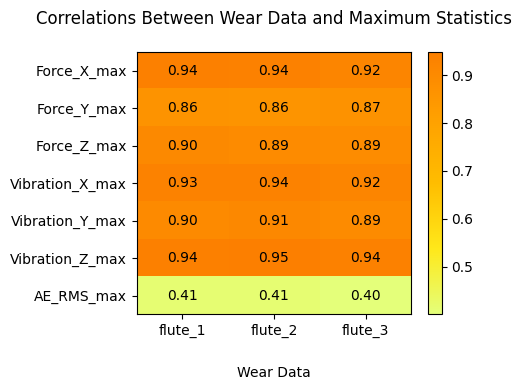

In [38]:
plt.figure(figsize=(5, 4))
plt.title('Correlations Between Wear Data and Maximum Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(max_correlation_matrix, cmap='Wistia', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(max_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(max_columns)), max_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [24]:
mean_columns = [
    'Force_X_mean', 
    'Force_Y_mean', 
    'Force_Z_mean', 
    'Vibration_X_mean', 
    'Vibration_Y_mean', 
    'Vibration_Z_mean', 
    'AE_RMS_mean'
]
mean_stats = c4_stats[mean_columns]
combined_data_mean = pd.concat([mean_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_mean = combined_data_mean.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
mean_correlation_matrix = corr_matrix_mean.loc[mean_columns, wear_columns]


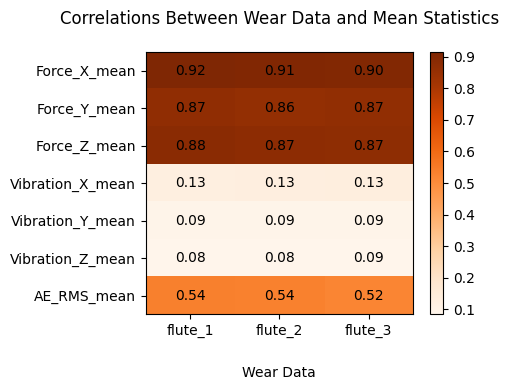

In [39]:
plt.figure(figsize=(5, 4))
plt.title('Correlations Between Wear Data and Mean Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(mean_correlation_matrix, cmap='Oranges', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(mean_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(mean_columns)), mean_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [26]:
std_columns = [
    'Force_X_std', 
    'Force_Y_std', 
    'Force_Z_std', 
    'Vibration_X_std', 
    'Vibration_Y_std', 
    'Vibration_Z_std', 
    'AE_RMS_std'
]
std_stats = c4_stats[std_columns]
combined_data_std = pd.concat([std_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_std = combined_data_std.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
std_correlation_matrix = corr_matrix_std.loc[std_columns, wear_columns]


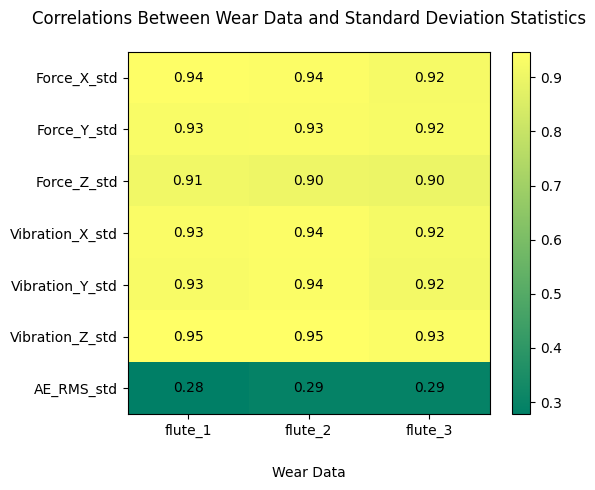

In [40]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Standard Deviation Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(std_correlation_matrix, cmap='summer', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(std_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(std_columns)), std_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [28]:
skew_columns = [
    'Force_X_skew', 
    'Force_Y_skew', 
    'Force_Z_skew', 
    'Vibration_X_skew', 
    'Vibration_Y_skew', 
    'Vibration_Z_skew', 
    'AE_RMS_skew'
]
skew_stats = c4_stats[skew_columns]
combined_data_skew = pd.concat([skew_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_skew = combined_data_skew.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
skew_correlation_matrix = corr_matrix_skew.loc[skew_columns, wear_columns]


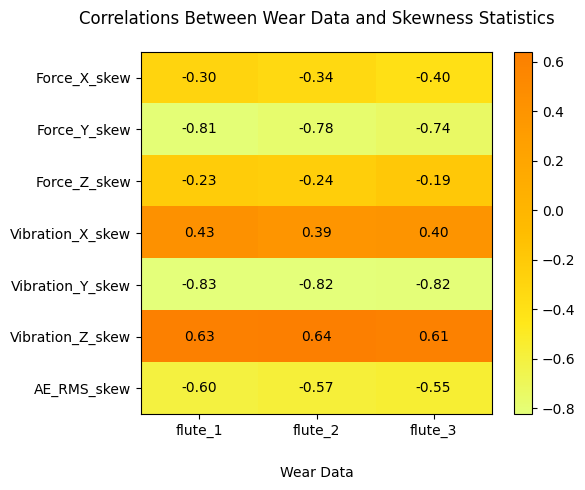

In [41]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Skewness Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(skew_correlation_matrix, cmap='Wistia', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(skew_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(skew_columns)), skew_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [30]:
kurtosis_columns = [
    'Force_X_kurtosis', 
    'Force_Y_kurtosis', 
    'Force_Z_kurtosis', 
    'Vibration_X_kurtosis', 
    'Vibration_Y_kurtosis', 
    'Vibration_Z_kurtosis', 
    'AE_RMS_kurtosis'
]
kurtosis_stats = c4_stats[kurtosis_columns]
combined_data_kurtosis = pd.concat([kurtosis_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_kurtosis = combined_data_kurtosis.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
kurtosis_correlation_matrix = corr_matrix_kurtosis.loc[kurtosis_columns, wear_columns]


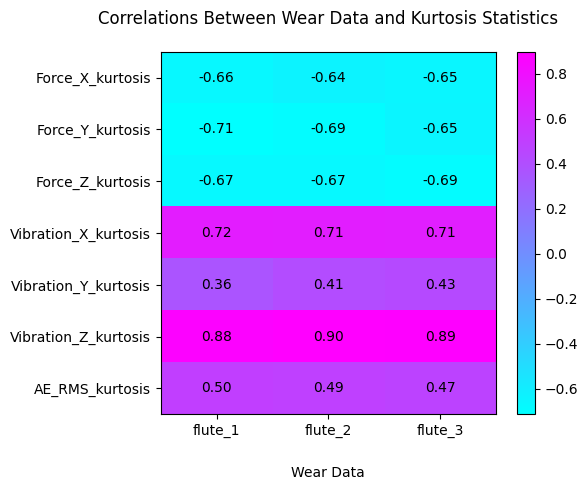

In [42]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Kurtosis Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(kurtosis_correlation_matrix, cmap='cool', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(kurtosis_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(kurtosis_columns)), kurtosis_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [32]:
zero_cross_columns = [
    'Force_X_zero_crossings', 
    'Force_Y_zero_crossings', 
    'Force_Z_zero_crossings', 
    'Vibration_X_zero_crossings', 
    'Vibration_Y_zero_crossings', 
    'Vibration_Z_zero_crossings', 
    'AE_RMS_zero_crossings'
]

zero_cross_stats = c4_stats[zero_cross_columns]
combined_data_zero_cross = pd.concat([zero_cross_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_zero_cross = combined_data_zero_cross.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
zero_cross_correlation_matrix = corr_matrix_zero_cross.loc[zero_cross_columns, wear_columns]



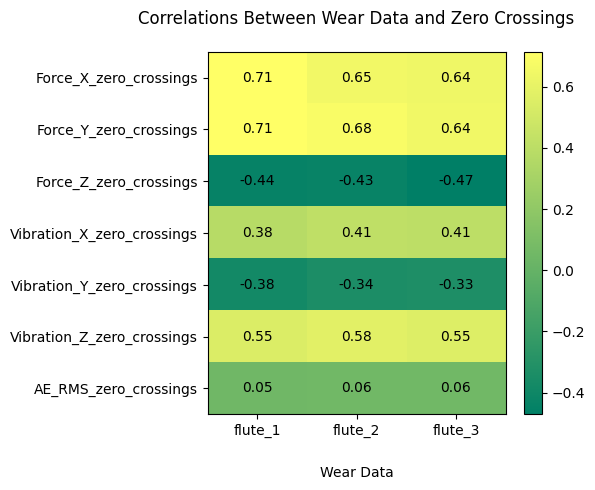

In [43]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Zero Crossings',  pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(zero_cross_correlation_matrix, cmap='summer', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(zero_cross_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(zero_cross_columns)), zero_cross_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [34]:
energy_columns = [
    'Force_X_energy', 
    'Force_Y_energy', 
    'Force_Z_energy', 
    'Vibration_X_energy', 
    'Vibration_Y_energy', 
    'Vibration_Z_energy', 
    'AE_RMS_energy'
]

energy_stats = c4_stats[energy_columns]

combined_data_energy = pd.concat([energy_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_energy= combined_data_energy.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
energy_correlation_matrix = corr_matrix_energy.loc[energy_columns, wear_columns]

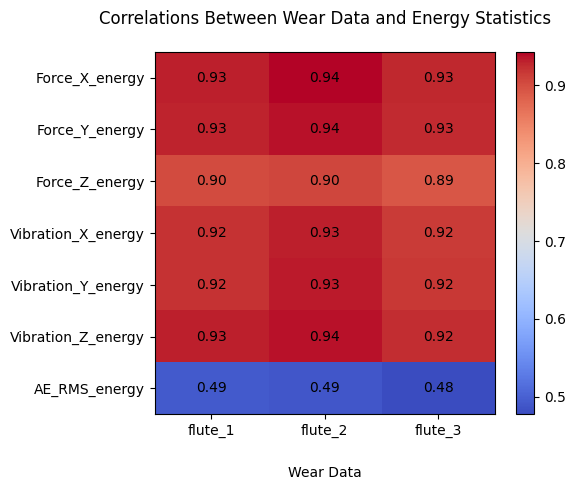

In [44]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Energy Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(energy_correlation_matrix, cmap='coolwarm', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(energy_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(energy_columns)), energy_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()